In [1]:
import speedtest
import time
from datetime import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [2]:
servers = [3254]

In [25]:
speed_log = []

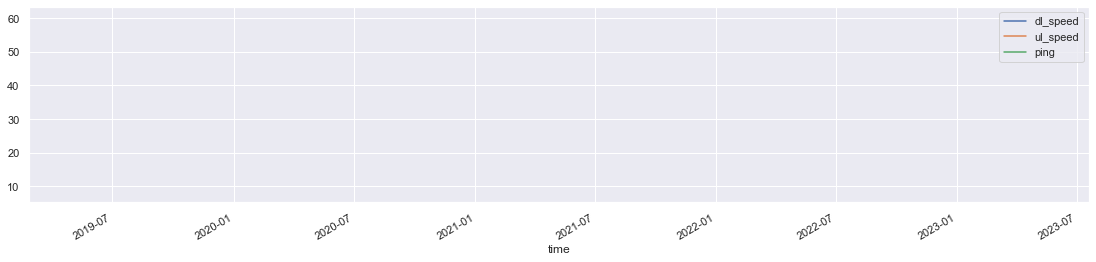

In [ ]:
while True:
    cur_time = datetime.now()
    timestamp = cur_time.timestamp()
    try:
#         s = speedtest.Speedtest()
        s.get_servers(servers)
        s.get_best_server()
        s.download(threads=None)
        s.upload(threads=None)
        s.results.share()
        results_dict = s.results.dict()
    
    except:
        print('test failed, retrying...')
        
    dl_speed = results_dict['download']/1000000
    ul_speed = results_dict['upload']/1000000
    ping = results_dict['ping']
    
    speed_log.append({'timestamp':timestamp,'time':cur_time,'dl_speed':dl_speed, 'ul_speed':ul_speed, 'ping':ping})
    
    df = pd.DataFrame(speed_log)
    sns.set(rc={'figure.figsize':(19, 4)})
    graph = df.plot.line(x = 'time', y = ['dl_speed','ul_speed','ping'])
    clear_output(wait=True)
    plt.show()
    time.sleep(30)

In [7]:
results_dict

{'download': 39389345.23958342,
 'upload': 7777022.786320441,
 'ping': 16.533,
 'server': {'url': 'http://speedtest-pth.vocus.net:8080/speedtest/upload.php',
  'lat': '-31.9554',
  'lon': '115.8585',
  'name': 'Perth',
  'country': 'Australia',
  'cc': 'AU',
  'sponsor': 'Vocus Communications',
  'id': '18249',
  'host': 'speedtest-pth.vocus.net:8080',
  'd': 1.3768809835076172,
  'latency': 16.533},
 'timestamp': '2021-05-06T13:27:17.418408Z',
 'bytes_sent': 10469376,
 'bytes_received': 49524276,
 'share': 'http://www.speedtest.net/result/11377664613.png',
 'client': {'ip': '180.150.80.36',
  'lat': '-31.9674',
  'lon': '115.8621',
  'isp': 'Aussie Broadband',
  'isprating': '3.7',
  'rating': '0',
  'ispdlavg': '0',
  'ispulavg': '0',
  'loggedin': '0',
  'country': 'AU'}}